In [1]:
import pandas as pd
from util import *
import numpy as np

In [2]:
url = "https://github.com/ayedaemon/RuckSack-Python/blob/master/log_analysis/access_log"
url1 = "https://github.com/ayedaemon/RuckSack-Python/blob/master/log_analysis/access_log2"
url2 = "https://github.com/robert456456456456/Web_server_log_parser/blob/master/devops.log"

In [3]:
df1 = html_to_df(url,clean_empty=True)
df2 = html_to_df(url1,clean_empty=True)
df = pd.concat([df1, df2],ignore_index=True)

In [4]:
columns = ["User Address","RFC931","User","date","gmt","action","status","size","referrer","browser"]
df = log_df(df,1,columns)

In [5]:
df.head()

,User Address,RFC931,User,date,gmt,action,status,size,referrer,browser
0,127.0.0.1,-,-,15/Jan/2021:08:54:07,+0000,GET /,403,4006,-,curl/7.61.1
1,127.0.0.1,-,-,15/Jan/2021:08:55:23,+0000,GET /cgi-bin/weakform.py,403,199,-,curl/7.61.1
2,127.0.0.1,-,-,15/Jan/2021:09:01:38,+0000,GET /cgi-bin/weak_form.py,200,19,-,curl/7.61.1
3,172.17.0.1,-,-,15/Jan/2021:09:02:14,+0000,GET /,403,4288,-,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...
4,172.17.0.1,-,-,15/Jan/2021:09:02:15,+0000,GET /noindex/common/css/bootstrap.min.css,200,99548,http://172.17.0.2/,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...


In [6]:
df['XSS_attack'] = df['action'].apply(XSS_finder)

In [7]:
df.head()

,User Address,RFC931,User,date,gmt,action,status,size,referrer,browser,XSS_attack
0,127.0.0.1,-,-,15/Jan/2021:08:54:07,+0000,GET /,403,4006,-,curl/7.61.1,False
1,127.0.0.1,-,-,15/Jan/2021:08:55:23,+0000,GET /cgi-bin/weakform.py,403,199,-,curl/7.61.1,False
2,127.0.0.1,-,-,15/Jan/2021:09:01:38,+0000,GET /cgi-bin/weak_form.py,200,19,-,curl/7.61.1,False
3,172.17.0.1,-,-,15/Jan/2021:09:02:14,+0000,GET /,403,4288,-,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False
4,172.17.0.1,-,-,15/Jan/2021:09:02:15,+0000,GET /noindex/common/css/bootstrap.min.css,200,99548,http://172.17.0.2/,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False


In [8]:
df.XSS_attack.unique()

array([False,  True])

In [9]:
df[df.XSS_attack == True]

,User Address,RFC931,User,date,gmt,action,status,size,referrer,browser,XSS_attack
754,172.17.0.1,-,-,15/Jan/2021:10:05:35,+0000,GET /cgi-bin/weak_form.py?fname=asdasd%3C%2Fp%...,200,355,http://172.17.0.2/cgi-bin/weak_form.py?fname=s...,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,True
757,172.17.0.1,-,-,16/Jan/2021:05:29:02,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,328,-,curl/7.74.0,True
758,172.17.0.1,-,-,16/Jan/2021:05:30:04,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,340,-,curl/7.74.0,True
759,172.17.0.1,-,-,16/Jan/2021:05:30:42,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,340,-,curl/7.74.0,True
760,172.17.0.1,-,-,16/Jan/2021:05:30:57,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,341,-,curl/7.74.0,True
761,172.17.0.1,-,-,16/Jan/2021:05:31:04,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True
762,172.17.0.1,-,-,16/Jan/2021:05:31:24,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True
763,172.17.0.1,-,-,16/Jan/2021:05:31:28,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,340,-,curl/7.74.0,True
764,172.17.0.1,-,-,16/Jan/2021:05:31:34,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True
765,172.17.0.1,-,-,16/Jan/2021:05:32:02,+0000,GET /cgi-bin/weak_form.py?fname=abcd&lname=111...,200,357,-,curl/7.74.0,True


In [10]:
import matplotlib.pyplot as plt

In [11]:
df['date'] = pd.to_datetime(df['date'], format = '%d/%b/%Y:%H:%M:%S')

Text(0.5, 0, 'Date')

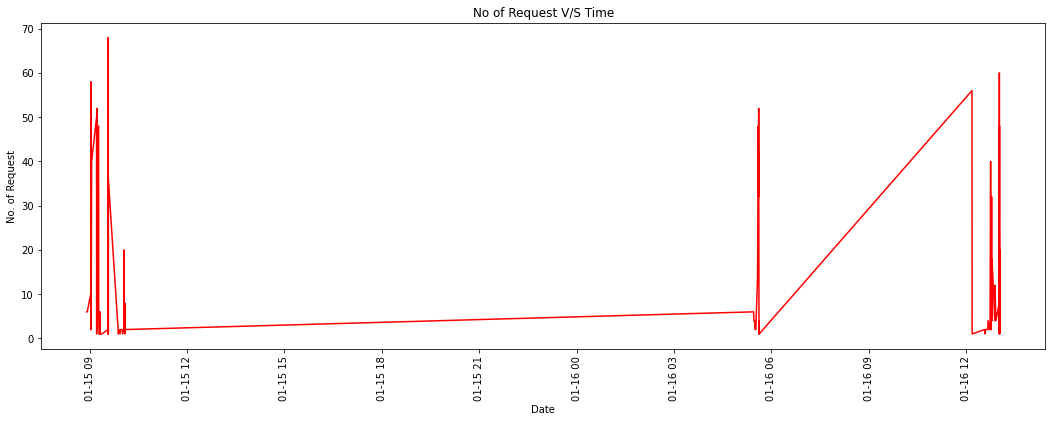

In [13]:
plt.figure(figsize = (18,6))
plt.plot_date(df.date.unique(),df.date.value_counts(sort = False) ,fmt = 'r-')
plt.xticks( rotation='vertical');
plt.title("No of Request V/S Time")
plt.ylabel("No. of Request")
plt.xlabel("Date")

In [16]:
import plotly.express as px
fig = px.line( x=df.date.unique(), y=df.date.value_counts(sort = False))
fig.update_layout(
    title="No of Request V/S Time",
     xaxis_title="Time",
    yaxis_title="No of Request")

fig.show()

In [18]:
plt.figure(figsize = (18,6),dpi = 1080)

plt.plot_date(df[df.XSS_attack==True].date.unique(),df[df.XSS_attack==True].date.value_counts(sort = False) ,fmt = 'r.-')
plt.plot_date(df[df.XSS_attack==False].date.unique(),df[df.XSS_attack==False].date.value_counts(sort = False) ,fmt = 'b.-')
plt.xticks( rotation='vertical');
plt.legend(labels = ['XSS Attacked','Not XSS Attacked'])
plt.title("No of Request V/S Time")
plt.ylabel("No. of Request")
plt.xlabel("Date");

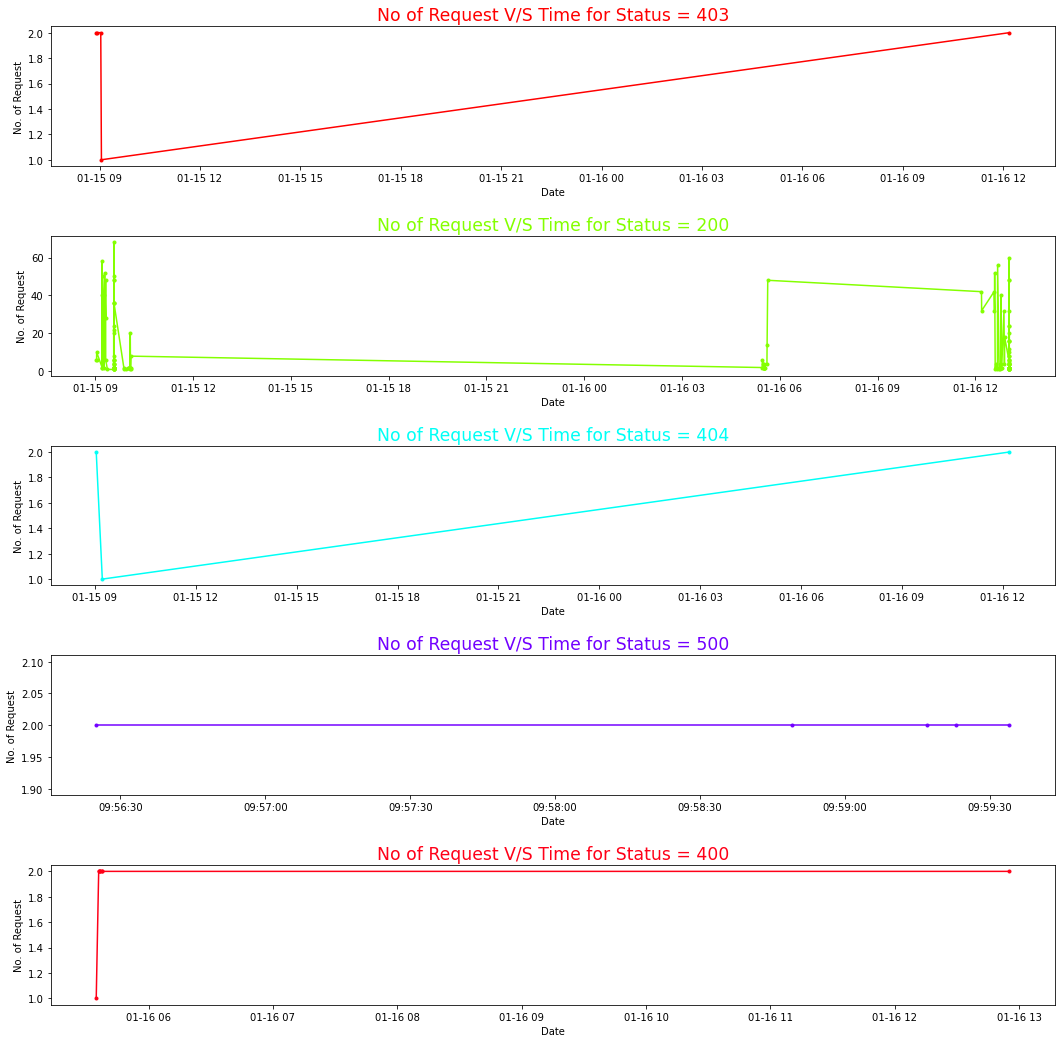

In [19]:
fig = plt.figure( figsize=(18,18))

status_l = list(df.status.unique())
cmap = plt.get_cmap("hsv")
colors = [cmap(i) for i in np.linspace(0, 1, len(status_l))]

for i,status in enumerate (status_l):
    ax = fig.add_subplot(len(status_l),1,i+1)
    ax.plot_date(df[df.status==status].date.unique(),df[df.status==status].date.value_counts(sort = False) ,fmt = '.-',color = colors[i])
    plt.title(f"No of Request V/S Time for Status = {status}", size = 'xx-large', color = colors[i])
    plt.ylabel("No. of Request")
    plt.xlabel("Date")
plt.subplots_adjust(hspace=0.5)
